# **Results**

In [1]:
# 2021 (c) Micha Johannes Birklbauer
#
# https://github.com/t0xic-m/
# micha.birklbauer@gmail.com

In [2]:
import pandas as pd

df_hc = pd.read_csv("haar_cascade_results/samples_test_pred2.csv")
df_edet = pd.read_csv("efficientdet_results/samples_test_pred2.csv")

In [3]:
df_hc.head(15)

,NAME,ymin,ymax,xmin,xmax,ymin_pred,ymax_pred,xmin_pred,xmax_pred,IoU,TP/FP,Precision,Recall,Precision_interpol
0,002094496.jpg,266.0,1080.0,887.0,1686.0,12.0,1075.0,386.0,1909.0,0.398638,FP,0.000000,0.000000,0.000000
1,007055006.jpg,100.0,274.0,282.0,429.0,35.0,458.0,119.0,629.0,0.119540,FP,0.000000,0.000000,0.000000
2,007349675.jpg,226.0,437.0,87.0,361.0,36.0,478.0,6.0,601.0,0.220810,FP,0.000000,0.000000,0.000000
3,011151221.jpg,82.0,349.0,239.0,429.0,20.0,384.0,24.0,442.0,0.334704,FP,0.000000,0.000000,0.000000
4,018050712.jpg,147.0,984.0,573.0,1919.0,2.0,1078.0,32.0,1864.0,0.535927,TP,0.200000,0.019608,0.200000
5,020584121.jpg,1.0,479.0,198.0,424.0,2.0,449.0,2.0,635.0,0.349388,FP,0.166667,0.019608,0.200000
6,021112594.jpg,194.0,606.0,859.0,1035.0,8.0,716.0,4.0,1277.0,0.080930,FP,0.142857,0.019608,0.200000
7,023917679.jpg,89.0,629.0,264.0,582.0,30.0,703.0,7.0,955.0,0.269812,FP,0.125000,0.019608,0.200000
8,025258601.jpg,336.0,708.0,591.0,846.0,2.0,667.0,31.0,1272.0,0.101463,FP,0.111111,0.019608,0.200000
9,027544668.jpg,187.0,931.0,916.0,1483.0,14.0,1026.0,211.0,1886.0,0.249242,FP,0.100000,0.019608,0.200000


In [7]:
bad_hc = df_hc.iloc[0,]
good_hc = df_hc.iloc[10,]
edet_0 = df_edet.iloc[0,]
edet_10 = df_edet.iloc[10,]

print(bad_hc["NAME"], edet_0["NAME"])
print(good_hc["NAME"], edet_10["NAME"])

002094496.jpg 002094496.jpg
028133859.jpg 028133859.jpg


In [8]:
import os
import cv2
import imageio
import numpy as np
from matplotlib import pyplot as plt

# return image with bounding box + save to current directory
def visualize_bbox(filename, bbox = None, method_name = "", show = False, save = True):
    img = imageio.imread(filename, as_gray = False)
    if bbox is not None:
        start_x = round(bbox[0])
        start_y = round(bbox[1])
        end_x = round(bbox[2])
        end_y = round(bbox[3])
        new_img = img.copy()
        new_img = cv2.rectangle(new_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)
        if show:
            plt.figure()
            f, axarr = plt.subplots(1,2)
            axarr[0].imshow(img)
            axarr[1].imshow(new_img)
            plt.show()   
        if save:
            imageio.imwrite(filename.split(".")[0] + "_" + method_name + "_bb.jpg", new_img)
        return new_img
    else:
        print("WARNING: No bounding box provided!")
        if save:
            imageio.imwrite(filename.split(".")[0] + "_" + method_name + "_bb.jpg", img)
        return img

<Figure size 432x288 with 0 Axes>

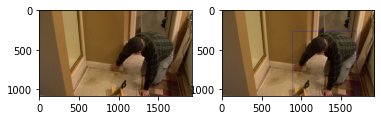

In [9]:
s = bad_hc
visualize_bbox("results/" + s["NAME"], [s["xmin"], s["ymin"], s["xmax"], s["ymax"]], method_name = "ground_truth", show = True, save = True);

<Figure size 432x288 with 0 Axes>

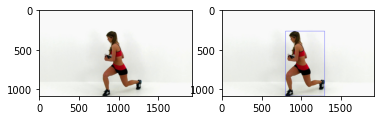

In [10]:
s = good_hc
visualize_bbox("results/" + s["NAME"], [s["xmin"], s["ymin"], s["xmax"], s["ymax"]], method_name = "ground_truth", show = True, save = True);

<Figure size 432x288 with 0 Axes>

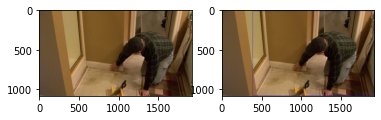

In [16]:
s = bad_hc
visualize_bbox("results/" + s["NAME"], [s["xmin_pred"], s["ymin_pred"], s["xmax_pred"], s["ymax_pred"]], method_name = "hc", show = True, save = True);

<Figure size 432x288 with 0 Axes>

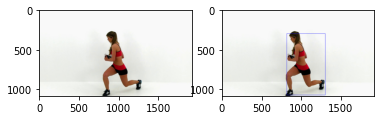

In [17]:
s = good_hc
visualize_bbox("results/" + s["NAME"], [s["xmin_pred"], s["ymin_pred"], s["xmax_pred"], s["ymax_pred"]], method_name = "hc", show = True, save = True);

<Figure size 432x288 with 0 Axes>

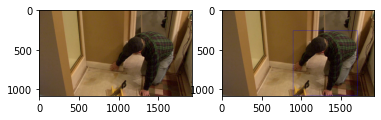

In [18]:
s = edet_0
visualize_bbox("results/" + s["NAME"], [s["xmin_pred"], s["ymin_pred"], s["xmax_pred"], s["ymax_pred"]], method_name = "edet", show = True, save = True);

<Figure size 432x288 with 0 Axes>

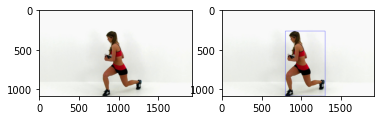

In [19]:
s = edet_10
visualize_bbox("results/" + s["NAME"], [s["xmin_pred"], s["ymin_pred"], s["xmax_pred"], s["ymax_pred"]], method_name = "edet", show = True, save = True);

In [15]:
print(bad_hc["IoU"], good_hc["IoU"])
print(edet_0["IoU"], edet_10["IoU"])

0.3986377416433718 0.901444383389591
0.9578785763296644 0.9827955936352508
